# Plotting pandapipes Networks

This tutorial shows how to plot a pandapipes network.

## Simple Plotting

The simple plot function allows you to plot networks to get a fast visualisation. There is no need to gain a deep 
understanding of the plotting module.

First of all, a simple network with genuine geodata is created. To get a better understanding of
creating networks, follow the [Creating a simple network](https://github.com/e2nIEE/pandapipes/blob/develop/tutorials/creating_a_simple_network.ipynb) tutorial.

In [2]:
import pandapipes as pp

# create an empty network
net = pp.create_empty_network()

# create network elements, such as junctions, external grid, pipes, valves, sinks and sources
junction1 = pp.create_junction(net, pn_bar=1.05, tfluid_k=293.15, name="Connection to External Grid", geodata=(0, 0))
junction2 = pp.create_junction(net, pn_bar=1.05, tfluid_k=293.15, name="Junction 2", geodata=(2, 0))
junction3 = pp.create_junction(net, pn_bar=1.05, tfluid_k=293.15, name="Junction 3", geodata=(7, 4))
junction4 = pp.create_junction(net, pn_bar=1.05, tfluid_k=293.15, name="Junction 4", geodata=(7, -4))
junction5 = pp.create_junction(net, pn_bar=1.05, tfluid_k=293.15, name="Junction 5", geodata=(5, 3))
junction6 = pp.create_junction(net, pn_bar=1.05, tfluid_k=293.15, name="Junction 6", geodata=(5, -3))

ext_grid = pp.create_ext_grid(net, junction=junction1, fluid="lgas", p_bar=1.1, t_k=293.15, name="Grid Connection")

pipe1 = pp.create_pipe_from_parameters(net, from_junction=junction1, to_junction=junction2, length_km=10, diameter_m=0.3, name="Pipe 1", geodata=[(0, 0), (2, 0)])
pipe2 = pp.create_pipe_from_parameters(net, from_junction=junction2, to_junction=junction3, length_km=2, diameter_m=0.3, name="Pipe 2", geodata=[(2, 0), (2, 4), (7, 4)])
pipe3 = pp.create_pipe_from_parameters(net, from_junction=junction2, to_junction=junction4, length_km=2.5, diameter_m=0.3, name="Pipe 3", geodata=[(2, 0), (2, -4), (7, -4)])
pipe4 = pp.create_pipe_from_parameters(net, from_junction=junction3, to_junction=junction5, length_km=1, diameter_m=0.3, name="Pipe 4", geodata=[(7, 4), (7, 3), (5, 3)])
pipe5 = pp.create_pipe_from_parameters(net, from_junction=junction4, to_junction=junction6, length_km=1, diameter_m=0.3, name="Pipe 5", geodata=[(7, -4), (7, -3), (5, -3)])

valve = pp.create_valve(net, from_junction=junction5, to_junction=junction6, diameter_m=0.05, opened=True)

sink = pp.create_sink(net, junction=junction4, mdot_kg_per_s=0.545, name="Sink 1")

source = pp.create_source(net, junction=junction3, mdot_kg_per_s=0.234, fluid='lgas')
pp.pipeflow(net)

In [3]:
net.res_junction

,p_bar,t_k,rho_kg_per_m3
0,1.100000,293.15,1.453647
1,1.058782,293.15,1.425165
2,1.058518,293.15,1.424983
3,1.051473,293.15,1.420115
4,1.054999,293.15,1.422551
5,1.054999,293.15,1.422551


The simple network contains the most common elements that are supported by the pandapipes format. 

<img src="pics/simple_network-1.png">

In comparison to the above image, the simple plot function shows the network as follows.

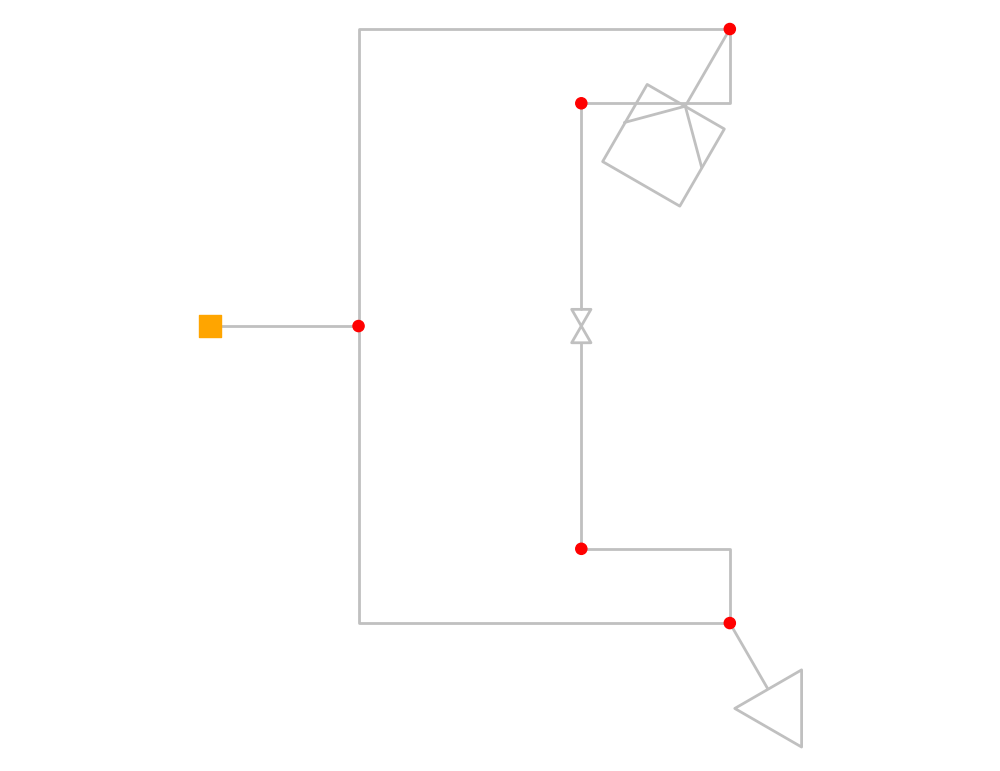

<AxesSubplot: >

In [4]:
# import the plotting module
import pandapipes.plotting as plot

# plot network
plot.simple_plot(net, plot_sinks=True, plot_sources=True, sink_size=4.0, source_size=4.0)


## Plotting Collections

Within the simple plot function, simple collections are generated automatically. For example a collection for all junctions, which are then plotted as red circles. 

However, the users can also define their own collections and plot them together. This allows for easy design modifications.

##### What is a collection?
A collection constist of an assemblage of different information about patchtype, colour, size and others. 

##### Patches
Patches are pre-designed symbols. There exist individual patches for valves and sources, or for symbols in the shape of a circle, rectangle, etc. 

##### Why using collections?
It is easier for the plotting module to sort certain elements in collections. This makes the plotting itself faster by reducing time and effort for calculations. Additionally you can control the layout of your plot individually by creating your own additional collections. 

##### Additional collections
If you want to mark some of the elements of your network differently, you can add them to an individual collections. For example, you can add all junctions with a sink connection to a collection called *junction_sink_collection* and set the collection configurations to an orange circle. By using this functions you can easily organize the plot or create an individual plot. 

##### Element sizes
The size of the elements corresponds with the size and the type of the plot. The size can be chosen manually or be fetched with the function *get_collection_sizes*.

To point out different elements, you can create additional collections for these elements.

In [5]:
# create additional junction collections for junctions with sink connections and junctions with valve connections
junction_sink_collection = plot.create_junction_collection(net, junctions=[3], patch_type="circle", size=0.1, color="orange", zorder=200)
junction_source_collection = plot.create_junction_collection(net, junctions=[2], patch_type="circle", size=0.1, color="green", zorder=200)
junction_valve_collection = plot.create_junction_collection(net, junctions=[4, 5], patch_type="rect",size=0.1, color="red", zorder=200)

# create additional pipe collection
pipe_collection = plot.create_pipe_collection(net, pipes=[3,4], linewidths=5., zorder=100)

Now, it is posssible to plot only the collections you designed individually. 

<AxesSubplot: >

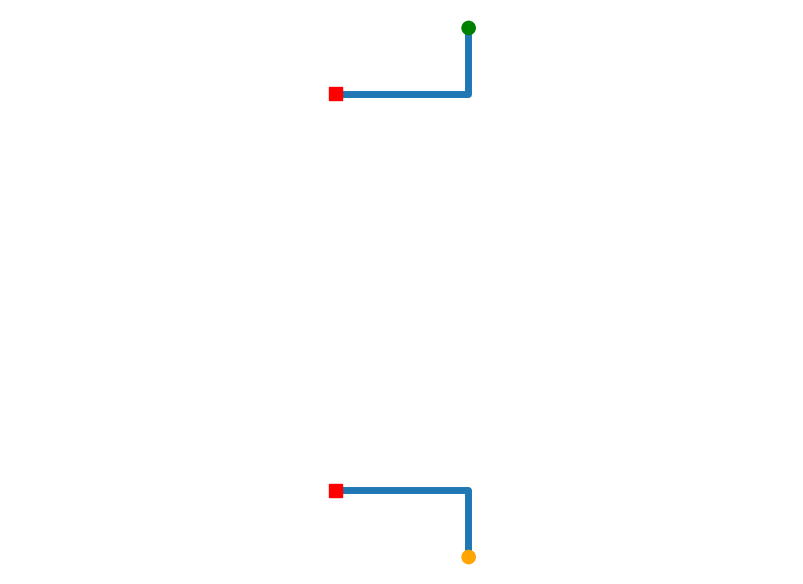

In [6]:
# plot collections of junctions and pipes
plot.draw_collections([junction_sink_collection, junction_source_collection, junction_valve_collection, pipe_collection],  figsize=(8,6))

If you want to plot your network including the additional collections you need to add them to the simple collections which are created automatically with the simple plot function. 

<AxesSubplot: >

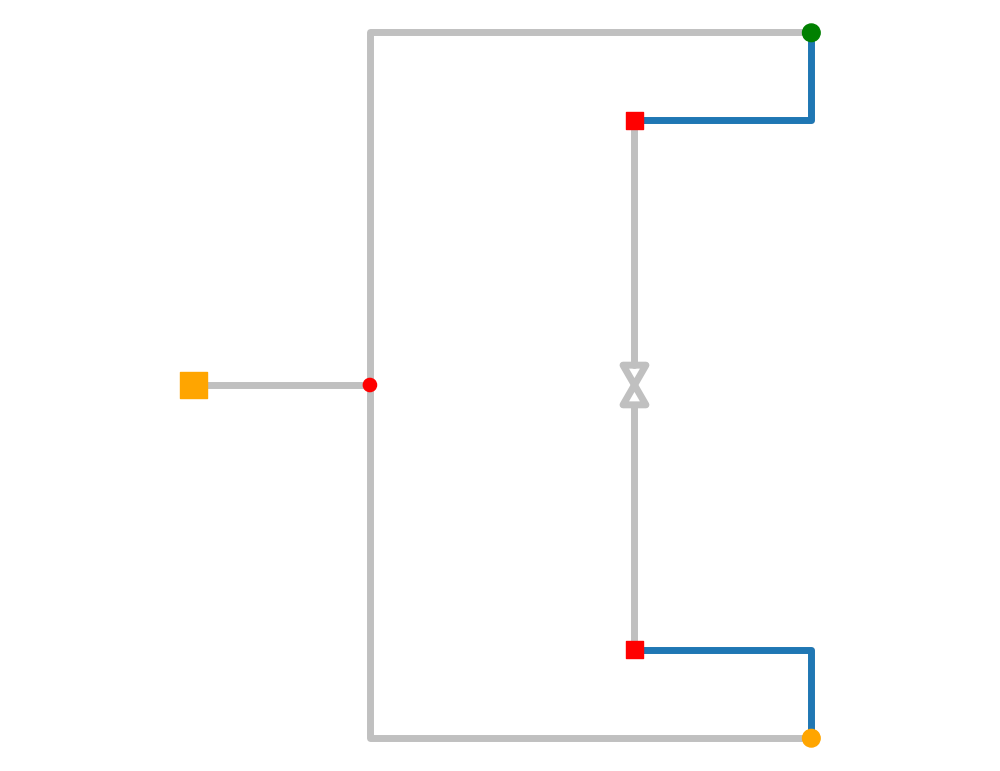

In [7]:
# create a list of simple collections
simple_collections = plot.create_simple_collections(net, as_dict=False)

# add additional collections to the list
simple_collections.append([junction_sink_collection, junction_source_collection, junction_valve_collection, pipe_collection])

# plot list of all collections
plot.draw_collections(simple_collections)

Keep in mind that additional collections can be layered above already existing collections. You need to set a high zorder for the elements you want to draw in front. 

As pandapipes is based on pandapower, more plotting tutorials with pandapower are available at https://www.pandapower.org/start/ .